# Data Cleaning

Data cleaning is the process of detecting and removing errors and inconsistencies from the data to improve its quality. Improper data cleaning process can lead to errors, faulty analysis, distortion in dataset and eventually incompatible datasets for machine learning purposes. There is no absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. My data cleaning process includes:

* Check the data types
* Check for duplicates - Primary key ('tweets.id')
* Check missing values
* Make text all lower case
* Remove links and images
* Remove hashtags
* Remove @ mentions
* Remove emojis
* Remove stop words
* Remove punctuation
* Get rid of stuff like "what's" and making it "what is'
* Stemming / lemmatization




In [ ]:
!pip install tweet-preprocessor
import preprocessor as p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2024/Depression data

/content/drive/MyDrive/2024/Depression data


In [ ]:
!pip install -qqq ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.7 MB/s eta 0:00:00


In [2]:
## Import required libraries

## warnings
import warnings
warnings.filterwarnings("ignore")

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import nltk
import re
import ftfy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

## for opening, manipulating, and saving many different image file f
from PIL import Image

## WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud
from nltk import pos_tag ## For Parts of Speech tagging
import random ## generating random numbers

ModuleNotFoundError: No module named 'ftfy'

# New section

## Load the datasets

In [ ]:
smdf=pd.read_csv("/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/processed/socialdepression.csv")

In [ ]:
smdf.shape

(25858, 3)

## Data Cleaning-Processing:

In [ ]:
smdf.head()

,Unnamed: 0,text,label
0,0,@Abeeliever Hi Sweetie! how r ya today? Hope a...,0
1,1,yay! Cookies from jab!,0
2,2,@ efpj SEE YOU ON THE 12TH!,0
3,3,this is how to show a loved one you care: How ...,1
4,4,- that explains alot.,0


In [ ]:
smdf.duplicated().sum()

0

In [ ]:
smdf.label.value_counts()

label
0    13538
1    12320
Name: count, dtype: int64

In [ ]:
smdf=smdf.iloc[:,1:]

In [ ]:
smdf

,text,label
0,@Abeeliever Hi Sweetie! how r ya today? Hope a...,0
1,yay! Cookies from jab!,0
2,@ efpj SEE YOU ON THE 12TH!,0
3,this is how to show a loved one you care: How ...,1
4,- that explains alot.,0
...,...,...
25853,a eurovision song contest victory dedicated to...,1
25854,confused about the uk euref here is what vote ...,1
25855,channing tatum is set to make some magic in si...,0
25856,trust us it was a nasty ordeal,1


In [ ]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
## Function to perform stepwise cleaning process
def tweets_cleaner(tweets):
  cleaned_tweets = []
  for tweet in tweets:
    tweet = tweet.lower() #lowercase

    # if url links then don't append to avoid news articles
    # also check tweet length, save those > 5
    if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 5:

      #remove hashtag, @mention, emoji and image URLs
      tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())

      #fix weirdly encoded texts
      tweet = ftfy.fix_text(tweet)

      #expand contraction
      tweet = expandContractions(tweet)


      #remove punctuation
      tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

      #stop words and lemmatization
      stop_words = set(stopwords.words('english'))
      word_tokens = nltk.word_tokenize(tweet)

      lemmatizer=WordNetLemmatizer()
      filtered_sentence = [lemmatizer.lemmatize(word) for word in word_tokens if not word in stop_words]
      # back to string from list
      tweet = ' '.join(filtered_sentence) # join words with a space in between them

      cleaned_tweets.append(tweet)

  return cleaned_tweets


In [1]:
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = p.clean(tweet)

        #expand contraction
        tweet = expandContractions(tweet)

        #remove punctuation
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

        #stop words
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)

        cleaned_tweets.append(tweet)

    return cleaned_tweets

NameError: name 're' is not defined

# Word Cloud:

To get the most common words used in depressive and random datasets, the POS-tag (Parts of Speech tagging) module in the NLTK library was used. Using the WordCloud library, one can generate a Word Cloud based on word frequency and superimpose these words on any image. In this case, I used the Twitter logo and Matplotlib to display the image. The Word Cloud shows the words with higher frequency in bigger text size while the "not-so" common words are in smaller text sizes.

In [ ]:
smdf.head()

,text,label
0,@Abeeliever Hi Sweetie! how r ya today? Hope a...,0
1,yay! Cookies from jab!,0
2,@ efpj SEE YOU ON THE 12TH!,0
3,this is how to show a loved one you care: How ...,1
4,- that explains alot.,0


In [ ]:
depress_post=smdf[smdf['label']==1]
non_depress_post=smdf[smdf['label']==0]

In [ ]:
# depressive_tweets_arr = [x for x in new_dep_df['text']]
# random_tweets_arr = [x for x in new_rand_df['text']]
depress_post_arr=[x for x in depress_post['text']]
non_depress_post_arr=[x for x in non_depress_post['text']]

# X_d = tweets_cleaner(depressive_tweets_arr)
# X_r = tweets_cleaner(random_tweets_arr)


F_d = tweets_cleaner(depress_post_arr)
F_r = tweets_cleaner(non_depress_post_arr)

In [ ]:
len(F_d)

12320

In [ ]:
len(depress_post_arr)

12320

In [ ]:
## function to obtain adjectives from tweets
def getadjectives(tweet):
    tweet = nltk.word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

### Depressive Tweets Exploration

In [ ]:
## Apply getadjectives function to the processed tweets
## Extract all tweets into one long string with each word separate with a "space"
fbtweets_long_string = [getadjectives(x) for x in F_d]
fbtweets_long_string = " ".join(fbtweets_long_string)

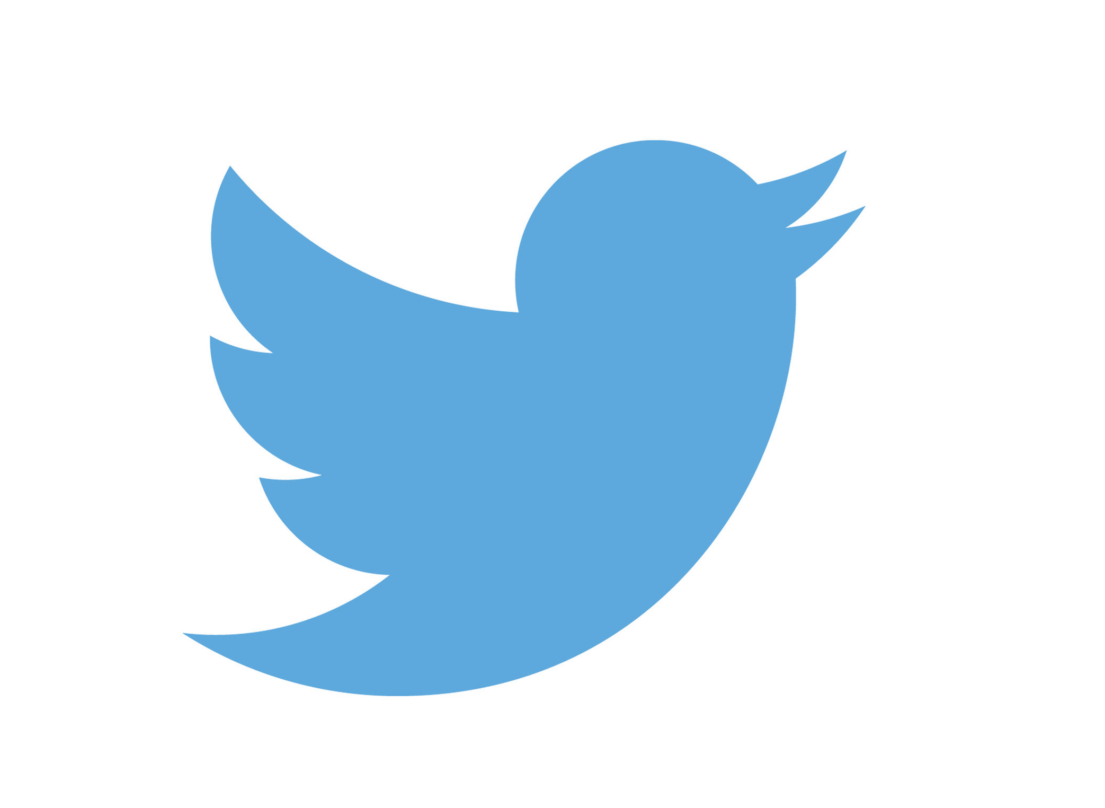

In [ ]:
# Import Twitter Logo
image = np.array(Image.open('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/img/logo.jpeg'))

fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [ ]:
## Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

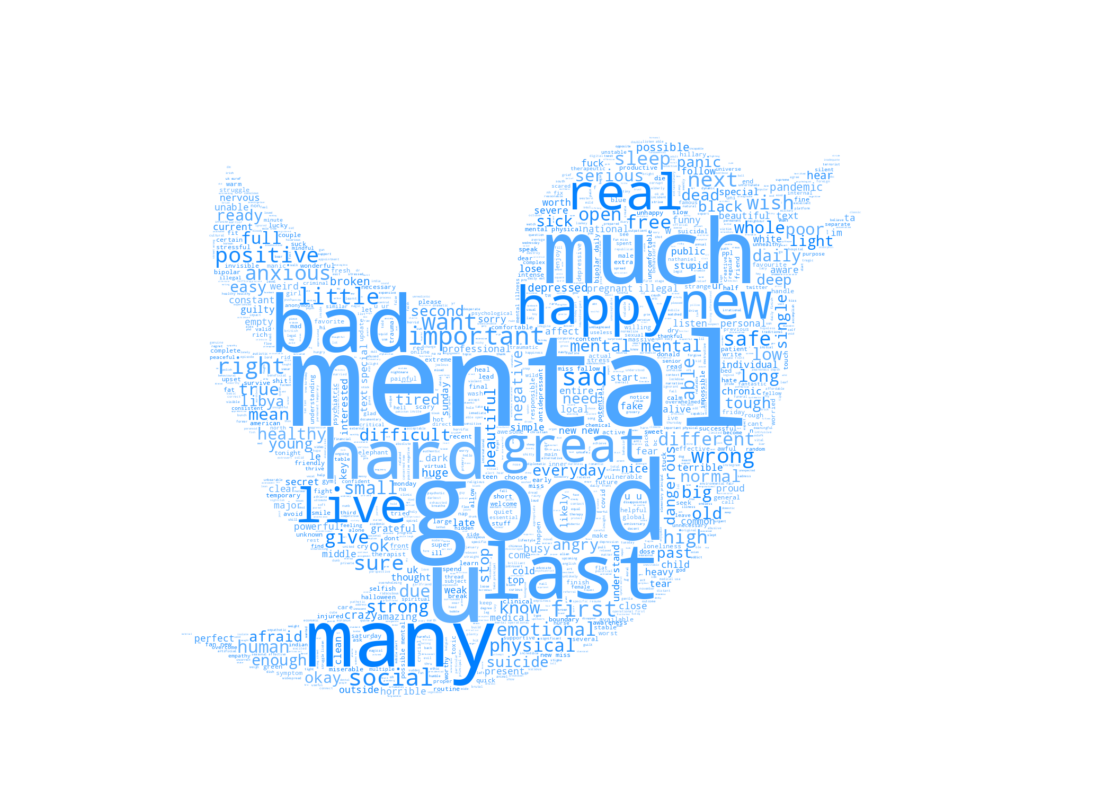

In [ ]:
## Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

## generate the word cloud
twitter_wc.generate(fbtweets_long_string)

## display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

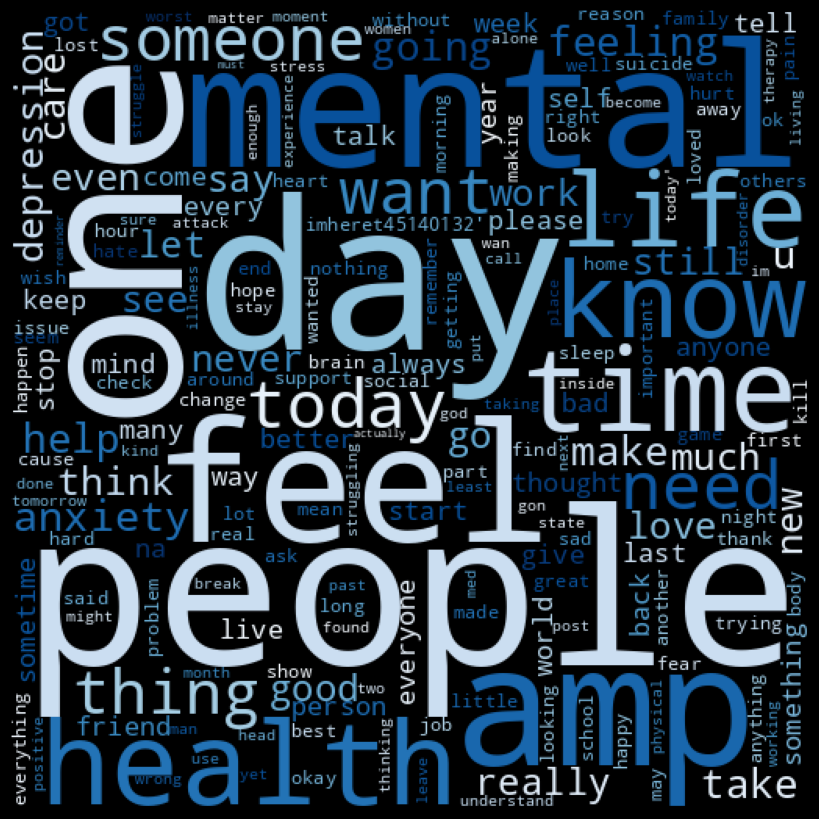

In [ ]:
depressive_fbtweets = [clean_tweets([t for t in depress_post['text']])]
depressive_words = ' '.join(list(map(str, depressive_fbtweets)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)


plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Analyzing Top Words in the Word Cloud for depressive dataset**

In [ ]:
## Combine all words in depressive into a list
fbtweets_long_string = [getadjectives(x) for x in F_d]
tweets_list=[]
for item in fbtweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [ ]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
df.head(10)  # Check dataframe first 10 rows

,Words,Count
10,mental,906
11,u,508
25,good,483
12,much,317
84,new,303
5,many,272
51,bad,264
9,last,253
74,hard,215
259,happy,214


### Random Tweets Exploration


In [ ]:
## Apply getadjectives function to the processed tweets
## Extract all tweets into one long string with each word separate with a "space"
fbtweets_long_string_rand = [getadjectives(x) for x in F_r]
fbtweets_long_string_rand = " ".join(fbtweets_long_string_rand)

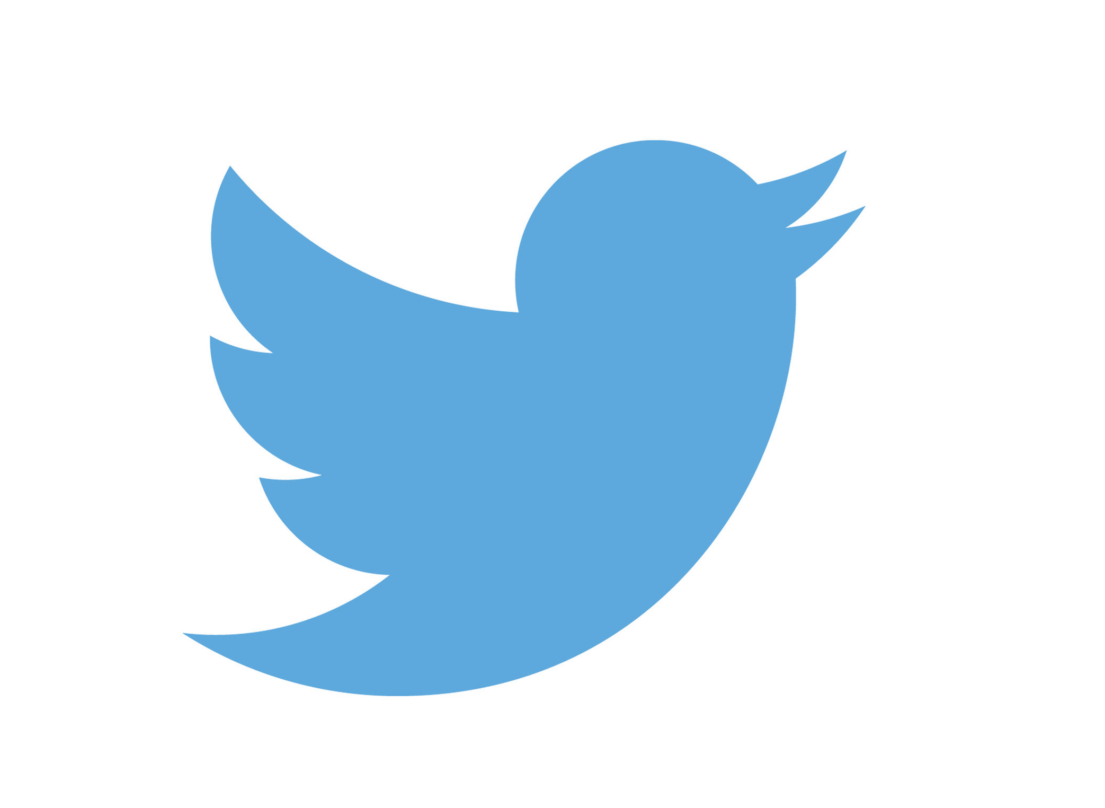

In [ ]:
# Import Twitter Logo
image = np.array(Image.open('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/img/logo.jpeg'))

fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [ ]:
## Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

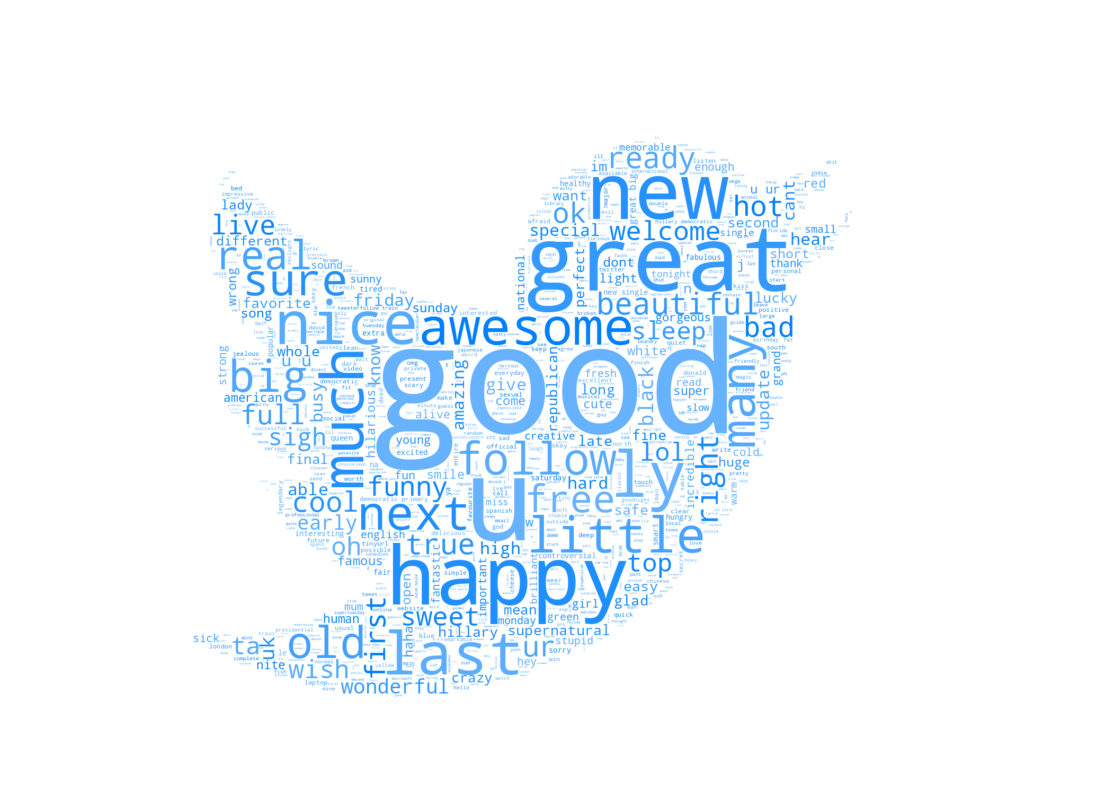

In [ ]:
## Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

## generate the word cloud
twitter_wc.generate(fbtweets_long_string_rand)

## display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

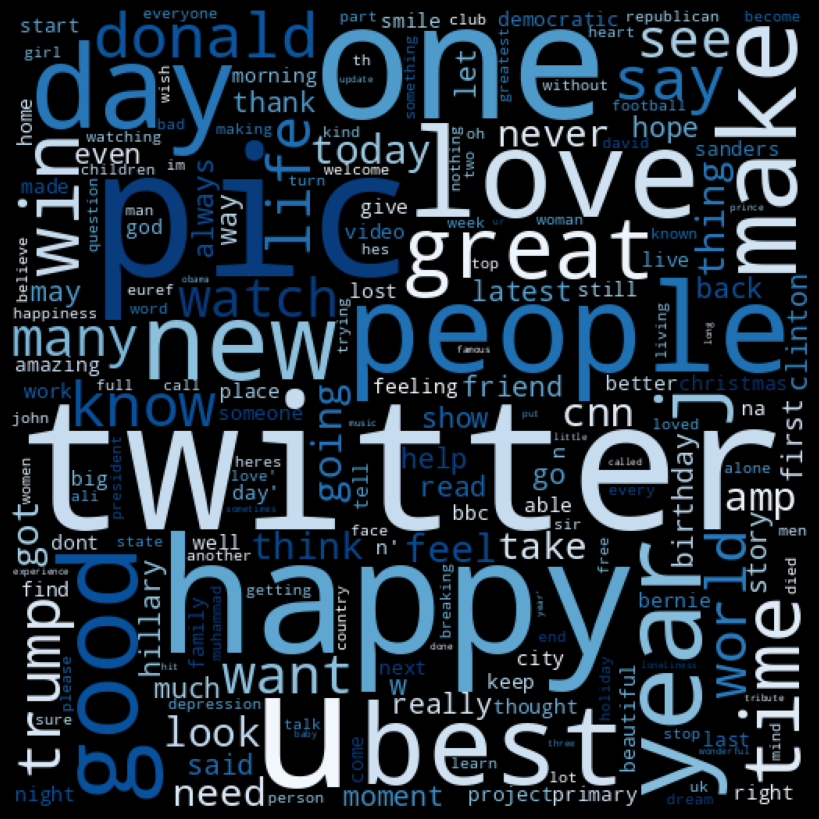

In [ ]:
nondepressive_fbtweets = [clean_tweets([t for t in non_depress_post['text']])]
nondepressive_words = ' '.join(list(map(str, nondepressive_fbtweets)))
nondepressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(nondepressive_words)


plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(nondepressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Analyzing Top Words in the Word Cloud for random dataset**

In [ ]:
## Combine all words in depressive into a list
tweets_long_string_rand = [getadjectives(x) for x in F_r]
tweets_list_rand=[]
for item in tweets_long_string_rand:
    item = item.split()
    for i in item:
        tweets_list_rand.append(i)

In [ ]:
## Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list_rand)
df_rand = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_rand.columns = ['Words', 'Count']
df_rand.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
df_rand.head(10)  # Check dataframe first 10 rows

,Words,Count
6,happy,200
9,u,164
13,great,141
20,good,136
230,many,95
71,new,89
103,much,54
540,hillary,54
3,last,45
15,able,42


## Data Analysis:

In [ ]:
fb_tweet_comb.shape

(5538, 3)

In [ ]:
## distribution of classes for prediction
def create_distribution(dataFile):
  return sns.countplot(x='target', data=dataFile, palette='hls')

<Axes: xlabel='target', ylabel='count'>

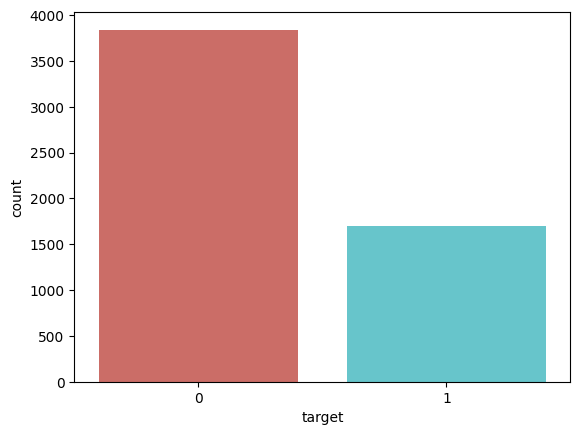

In [ ]:
create_distribution(fb_tweet_comb)

Depreesive and random (Non-depressive) tweets are almost evenly distributed.

**Finding distribution of tweet lengths**

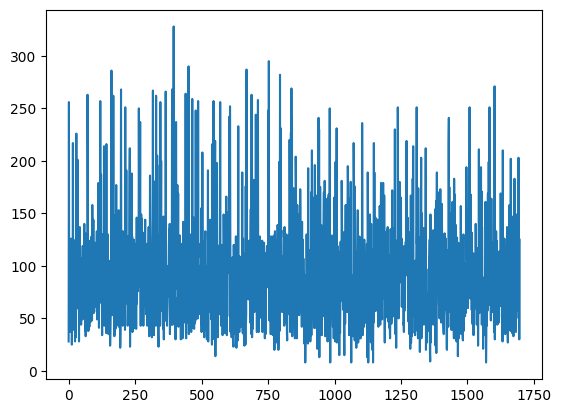

In [ ]:
dep_line_lengths = [len(statement) for statement in depress_post['text']]
plt.plot(dep_line_lengths)
plt.show()

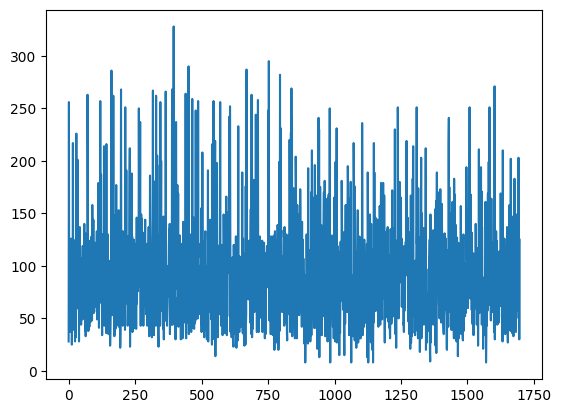

In [ ]:
rand_line_lengths = [len(statement) for statement in non_depress_post['text']]
plt.plot(dep_line_lengths)
plt.show()

From the distributions above, it is clear that there is no outliers in our depressive and random datasets.

## Cleaning combined dataset and save it

In [ ]:
fb_tweet_comb.shape

(5538, 3)

In [ ]:
fb_tweet_comb_arr = [x for x in fb_tweet_comb['text']]

In [ ]:
len(fb_tweet_comb_arr)

5538

In [ ]:
corpus = clean_tweets(fb_tweet_comb_arr)

In [ ]:
corpus[:10]

['miss friends badly',
 'believe days work back tomorrow',
 'want soccer season baaaack',
 'bolarotibi jamesatye jacksonhull danielmarion done interesting informative exhilarating',
 'matter hard try force memories mind much loved love want think much miss person need feel way would talk would spend time',
 'spending last day bed rough hell sun shining',
 'angieavlianos hey angie please see local dealer happy assist',
 'shreyaghoshal waiting fv live session bdw sings lots songs us session',
 'suffering serious depression sucks plans times everything',
 'unaware gon na']

In [ ]:
print(len(fb_tweet_comb_arr))
print(len(corpus))

5538
5538


In [ ]:
## Adding clean tweets as a new column
fb_tweet_comb['clean_text'] = corpus

We have to remove those rows with tweets that has been completely deleted in the cleaning process.

In [ ]:
# replace field that's entirely space (or empty) with NaN
fb_tweet_comb.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
fb_tweet_comb[fb_tweet_comb['clean_text'].isnull()]

,Unnamed: 0,text,target,clean_text
57,57,138 ???????????????????????????????????????...,0,NaN
106,106,135 ????????? ?????????????????2?????? ??...,0,NaN
240,240,106 ????????????????????????????????????????...,0,NaN
610,610,????? ?? ???? ?? ?? ??? ????? ??? ??..!,0,NaN
762,762,146 ???????????????????????????????????????...,0,NaN
795,795,112 ????????????????????? ??????????????...,0,NaN
803,803,(y'all) #snap,0,NaN
848,848,121 ????????????????????????????????????????...,0,NaN
954,954,147 ??????????????????????????????????????? ?...,0,NaN
1077,1077,144 ???????????????????? ????????????1????...,0,NaN


In [ ]:
## Deleting the rows with nan
fb_tweet_comb.dropna(subset=['clean_text'], inplace=True)

In [ ]:
## Double_check for nan
fb_tweet_comb[fb_tweet_comb['clean_text'].isnull()]

,Unnamed: 0,text,target,clean_text


In [ ]:
fb_tweet_comb.head()

,Unnamed: 0,text,target,clean_text
0,0,I miss my friends so badly 😢,1,miss friends badly
1,1,Can't believe I had 4 days off work and I'm ba...,0,believe days work back tomorrow
2,2,I just want soccer season baaaack???­???­???­,0,want soccer season baaaack
3,3,@bolarotibi @jamesatye @jacksonhull @danielmar...,0,bolarotibi jamesatye jacksonhull danielmarion ...
4,4,"No matter how hard I try, I cannot force her m...",1,matter hard try force memories mind much loved...


In [ ]:
fb_tweet_comb.shape

(5518, 4)

In [ ]:
fb_tweet_comb.to_csv('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/processed_data.csv', encoding='utf-8',index=False)

In [ ]:
dft=pd.read_csv("/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/processed_data.csv")

In [ ]:
dft.head()

,Unnamed: 0,text,target,clean_text
0,0,I miss my friends so badly 😢,1,miss friends badly
1,1,Can't believe I had 4 days off work and I'm ba...,0,believe days work back tomorrow
2,2,I just want soccer season baaaack???­???­???­,0,want soccer season baaaack
3,3,@bolarotibi @jamesatye @jacksonhull @danielmar...,0,bolarotibi jamesatye jacksonhull danielmarion ...
4,4,"No matter how hard I try, I cannot force her m...",1,matter hard try force memories mind much loved...
